In [1]:
import pandas as pd
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Check if preprocessed dataSet is present for Classification
if not(os.path.isfile("Data/Cleaned/loanDataForClassification.csv") & os.path.isfile("Data/Cleaned/rejectLoanDataForClassification.csv")):
    rejectLoanFile = "Data/Cleaned/cleaned_reject_loandata.csv"
    loanFile = "Data/Cleaned/cleaned_loandata.csv"

    featuresFromRejectData = ['Amount Requested', 'Risk_Score', 'Debt-To-Income Ratio', 'State', 'Employment Length']
    featuresFromLoanData = ['loan_amnt', 'risk_score', 'dti', 'addr_state', 'emp_length', 'loan_status']


    rejectData = pd.read_csv(rejectLoanFile, encoding = "ISO-8859-1", low_memory= False, usecols = featuresFromRejectData)
    loanData = pd.read_csv(loanFile, encoding = "ISO-8859-1", low_memory= False, usecols = featuresFromLoanData)
    
    rejectData['Debt-To-Income Ratio'] = rejectData['Debt-To-Income Ratio'].str.replace('%','')
    rejectData['Debt-To-Income Ratio'] = rejectData['Debt-To-Income Ratio'].astype(np.float64)
    
    rejectData['Issue_Loan_Flag'] = 0
    loanData['Issue_Loan_Flag'] = 1

        # loanData['loan_status'].unique()
    loanData.loc[(loanData['loan_status'] == 'Does not meet the credit policy. Status:Fully Paid'), ['Issue_Loan_Flag']] = 0
    loanData.loc[(loanData['loan_status'] == 'Does not meet the credit policy. Status:Charged Off'), ['Issue_Loan_Flag']] = 0
    loanData.loc[(loanData['loan_status'] == 'Charged Off'), ['Issue_Loan_Flag']] = 0
    loanData.loc[(loanData['loan_status'] == 'Default'), ['Issue_Loan_Flag']] = 0
    featuresFromLoanData = ['loan_amnt', 'risk_score', 'dti', 'addr_state', 'emp_length', 'Issue_Loan_Flag']
    loanData = loanData[featuresFromLoanData]

        # Rename Columns
    columnNames = ['Amount_Requested', 'Risk_Score', 'Debt-To-Income_Ratio', 'State', 'Employment_Length', 'Issue_Loan_Flag']
    loanData.columns = columnNames
    rejectData.columns = columnNames




        # Save dataset for classification
    loanData.to_csv("Data/Cleaned/loanDataForClassification.csv", sep=',', index = False)
    rejectData.to_csv("Data/Cleaned/rejectLoanDataForClassification.csv", sep=',', index = False)

else:
    loanData = pd.read_csv("Data/Cleaned/loanDataForClassification.csv", encoding = "ISO-8859-1", low_memory= False)
    rejectData = pd.read_csv("Data/Cleaned/rejectLoanDataForClassification.csv", encoding = "ISO-8859-1", low_memory= False)

In [2]:
def RandomForestClassifier_(X_train,X_test, y_train, y_test):

    print("______________________START OF RANDOM FOREST CLASSIFIER____________________")


    clf = RandomForestClassifier(n_jobs=2)
    clf.fit(X_train, y_train)

    # result = pd.crosstab(y_test, X_test, rownames=['actual'], colnames=['preds'])

    pred = clf.predict(X_test)


    print (accuracy_score(y_test, pred))


    # CONFUSION MATRIX
#     confusion_mat = confusion_matrix(y_test, pred, labels=[1, 2])
#     print(confusion_mat)
    
    print (pd.crosstab(y_test, pred, rownames=["Actual"], colnames=["Pred"]))
#     ROC Curve
    
    fpr, tpr, _ = roc_curve(y_test, pred)
    
    
    plt.figure()
    plt.plot(fpr, tpr, label = 'ROC Curve')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity')
    plt.ylabel('Sensitivity')
    plt.title('ROC curve - Random Forest')
    plt.legend(loc="lower right")
    plt.show()
    
    print("______________________END OF RANDOM FOREST CLASSIFIER____________________")


______________________START OF RANDOM FOREST CLASSIFIER____________________
0.971590838042
Pred          0       1
Actual                 
0       9720506  274331
1         16472  224931


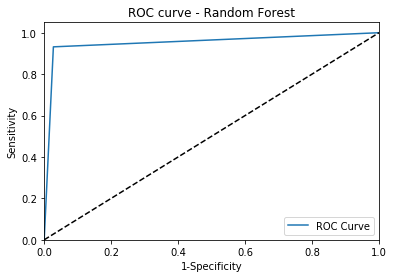

______________________END OF RANDOM FOREST CLASSIFIER____________________


In [3]:
# Split Dataset into train and test and prepare for training model
msk = np.random.rand(len(loanData)) < 0.8

trainLoanData = loanData[msk]

testLoanData = loanData[~msk]

msk = np.random.rand(len(rejectData)) < 0.1

trainRejectData = rejectData[msk]

testRejectData = rejectData[~msk]

trainData = pd.concat([trainLoanData, trainRejectData])

testData = pd.concat([testLoanData, testRejectData])

target = "Issue_Loan_Flag"

predictorVariables = ['Amount_Requested', 'Risk_Score', 'Debt-To-Income_Ratio', 'Employment_Length']

X_train = trainData[predictorVariables]
X_test = testData[predictorVariables]
y_train = trainData[target]
y_test = testData[target]

RandomForestClassifier_(X_train,X_test, y_train, y_test)

______________________START OF RANDOM FOREST CLASSIFIER____________________
0.975099943203
Pred          0       1
Actual                 
0       8681740  205166
1         22145  219884


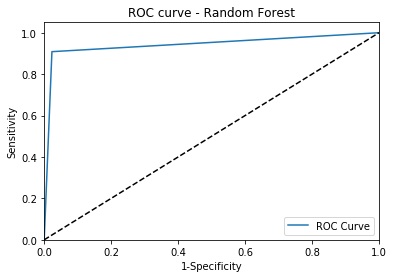

______________________END OF RANDOM FOREST CLASSIFIER____________________


In [4]:
# Split Dataset into train and test and prepare for training model
msk = np.random.rand(len(loanData)) < 0.8

trainLoanData = loanData[msk]

testLoanData = loanData[~msk]

msk = np.random.rand(len(rejectData)) < 0.2

trainRejectData = rejectData[msk]

testRejectData = rejectData[~msk]

trainData = pd.concat([trainLoanData, trainRejectData])

testData = pd.concat([testLoanData, testRejectData])

target = "Issue_Loan_Flag"

predictorVariables = ['Amount_Requested', 'Risk_Score', 'Debt-To-Income_Ratio', 'Employment_Length']

X_train = trainData[predictorVariables]
X_test = testData[predictorVariables]
y_train = trainData[target]
y_test = testData[target]

RandomForestClassifier_(X_train,X_test, y_train, y_test)

______________________START OF RANDOM FOREST CLASSIFIER____________________
0.976460550082
Pred          0       1
Actual                 
0       5461963  102937
1         33735  207448


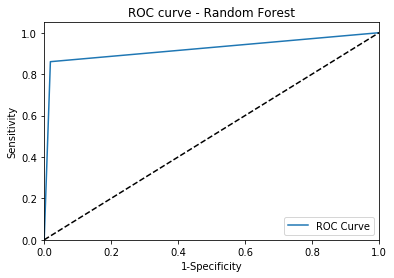

______________________END OF RANDOM FOREST CLASSIFIER____________________


In [5]:
# Split Dataset into train and test and prepare for training model
msk = np.random.rand(len(loanData)) < 0.8

trainLoanData = loanData[msk]

testLoanData = loanData[~msk]

msk = np.random.rand(len(rejectData)) < 0.5

trainRejectData = rejectData[msk]

testRejectData = rejectData[~msk]

trainData = pd.concat([trainLoanData, trainRejectData])

testData = pd.concat([testLoanData, testRejectData])

target = "Issue_Loan_Flag"

predictorVariables = ['Amount_Requested', 'Risk_Score', 'Debt-To-Income_Ratio', 'Employment_Length']

X_train = trainData[predictorVariables]
X_test = testData[predictorVariables]
y_train = trainData[target]
y_test = testData[target]

RandomForestClassifier_(X_train,X_test, y_train, y_test)

______________________START OF RANDOM FOREST CLASSIFIER____________________
0.964367847147
Pred          0       1
Actual                 
0       2192301   45344
1         43019  199203


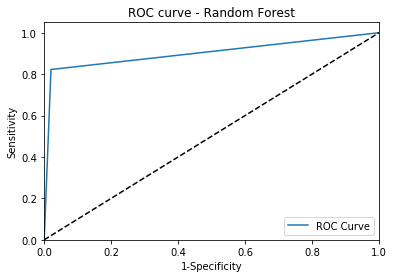

______________________END OF RANDOM FOREST CLASSIFIER____________________


In [6]:
# Split Dataset into train and test and prepare for training model
msk = np.random.rand(len(loanData)) < 0.8

trainLoanData = loanData[msk]

testLoanData = loanData[~msk]

msk = np.random.rand(len(rejectData)) < 0.8

trainRejectData = rejectData[msk]

testRejectData = rejectData[~msk]

trainData = pd.concat([trainLoanData, trainRejectData])

testData = pd.concat([testLoanData, testRejectData])

target = "Issue_Loan_Flag"

predictorVariables = ['Amount_Requested', 'Risk_Score', 'Debt-To-Income_Ratio', 'Employment_Length']

X_train = trainData[predictorVariables]
X_test = testData[predictorVariables]
y_train = trainData[target]
y_test = testData[target]

RandomForestClassifier_(X_train,X_test, y_train, y_test)